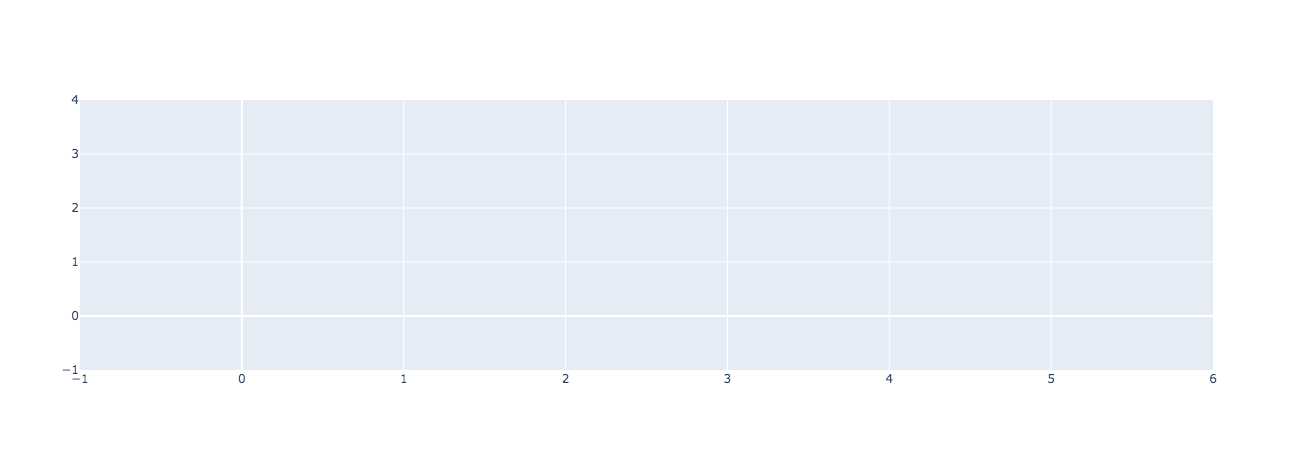

In [1]:
import plotly.graph_objects as go

go.Figure()

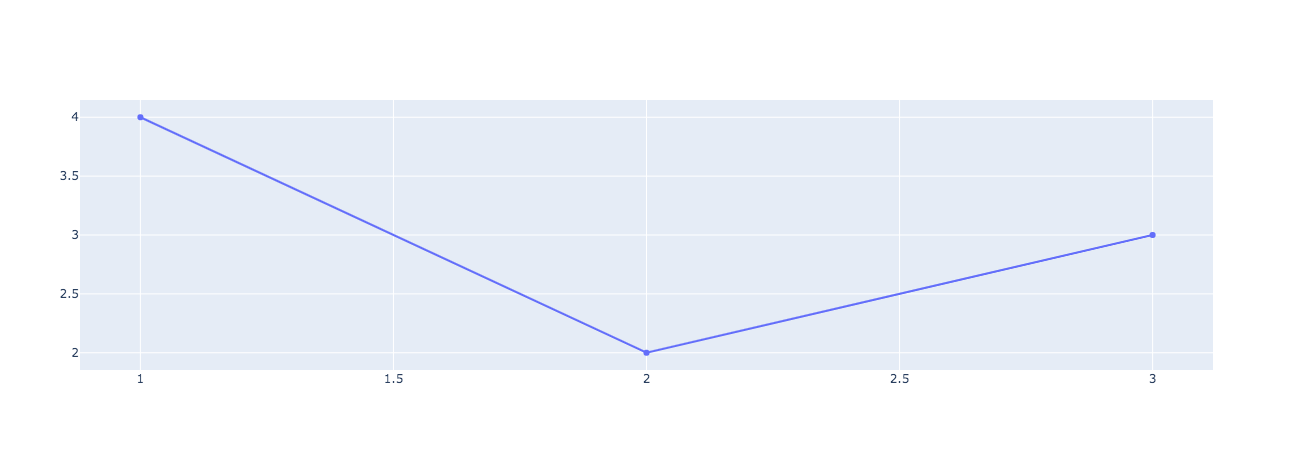

In [2]:
fig = go.Figure()
fig.add_scatter(x=[1, 2, 3], y=[4, 2, 3])
fig.show()

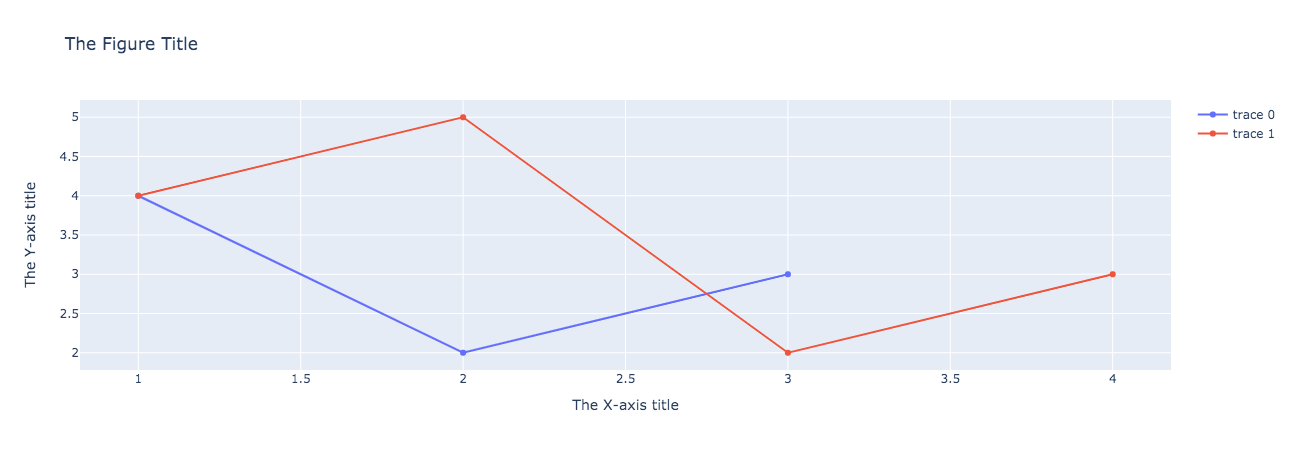

In [3]:
fig.add_scatter(x=[1, 2, 3, 4], y=[4, 5, 2, 3])
fig.layout.title = 'The Figure Title'
fig.layout.xaxis.title = 'The X-axis title'
fig.layout.yaxis.title = 'The Y-axis title'

fig.show()

In [4]:
fig.show('json')

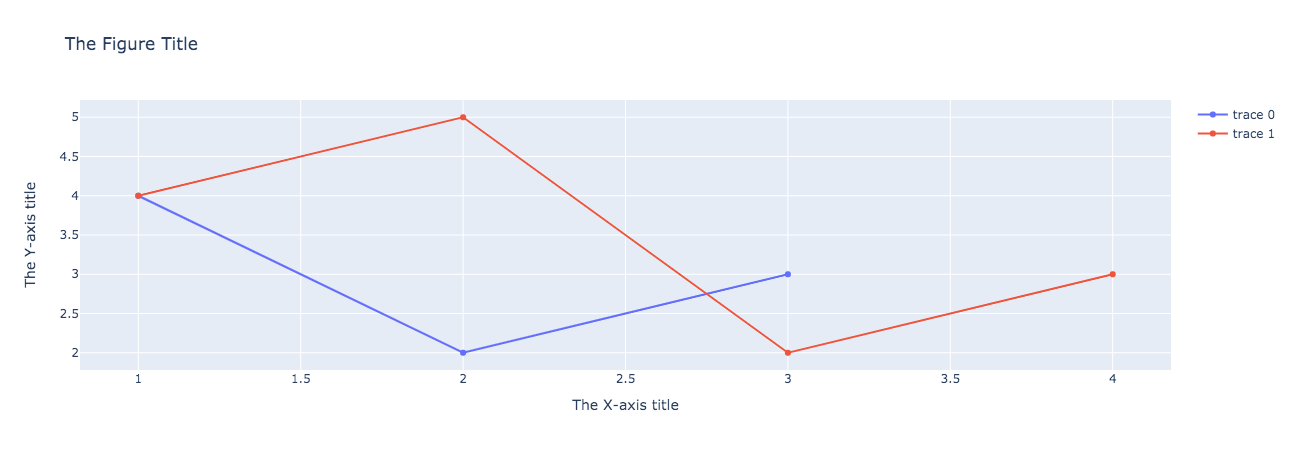

In [5]:
fig.show(config={'displaylogo': False,
                 'modeBarButtonsToAdd': ['drawrect',
                                         'drawcircle',
                                         'eraseshape']})

In [6]:
fig.write_html('html_plot.html',
               config={'toImageButtonOptions':
                       {'format': 'svg'}})

In [7]:
import pandas as pd
poverty_data = pd.read_csv('../data/PovStatsData.csv')
poverty_data.head()

Country Name Country Code  \
0  East Asia & Pacific          EAS   
1  East Asia & Pacific          EAS   
2  East Asia & Pacific          EAS   
3  East Asia & Pacific          EAS   
4  East Asia & Pacific          EAS   

                                      Indicator Name     Indicator Code  1974  \
0  Annualized growth in per capita real survey me...     SI.SPR.PC40.ZG   NaN   
1  Annualized growth in per capita real survey me...     SI.SPR.PT10.ZG   NaN   
2  Annualized growth in per capita real survey me...     SI.SPR.PT60.ZG   NaN   
3  Annualized growth in per capita real survey me...     SI.SPR.PCAP.ZG   NaN   
4  Annualized growth in per capita real survey me...  SI.POV.XPND.MD.ZG   NaN   

   1975  1976  1977  1978  1979  ...  2011  2012  2013  2014  2015  2016  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2017  2018  2019  Unnamed: 50  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN          NaN  
3   NaN   NaN   NaN          NaN  
4   NaN   NaN   NaN          NaN  

[5 rows x 51 columns]

In [8]:
regions = ['East Asia & Pacific', 'Europe & Central Asia',
           'Fragile and conflict affected situations', 'High income',
           'IDA countries classified as fragile situations',
           'IDA total', 'Latin America & Caribbean', 'Low & middle income',
           'Low income', 'Lower middle income', 'Middle East & North Africa',
           'Middle income', 'South Asia', 'Sub-Saharan Africa',
           'Upper middle income', 'World']

In [9]:
population_df = poverty_data[~poverty_data['Country Name'].isin(regions) & 
                             (poverty_data['Indicator Name']== 'Population, total')]
population_df.head()

Country Name Country Code     Indicator Name Indicator Code        1974  \
1051  Afghanistan          AFG  Population, total    SP.POP.TOTL  12412950.0   
1115      Albania          ALB  Population, total    SP.POP.TOTL   2350124.0   
1179      Algeria          DZA  Population, total    SP.POP.TOTL  16149025.0   
1243       Angola          AGO  Population, total    SP.POP.TOTL   6761380.0   
1307    Argentina          ARG  Population, total    SP.POP.TOTL  25462302.0   

            1975        1976        1977        1978        1979  ...  \
1051  12689160.0  12943093.0  13171306.0  13341198.0  13411056.0  ...   
1115   2404831.0   2458526.0   2513546.0   2566266.0   2617832.0  ...   
1179  16607707.0  17085801.0  17582904.0  18102266.0  18647815.0  ...   
1243   7024000.0   7279509.0   7533735.0   7790707.0   8058067.0  ...   
1307  25865776.0  26264681.0  26661398.0  27061047.0  27471036.0  ...   

            2011        2012        2013        2014        2015        2016  \
1051  30117413.0  31161376.0  32269589.0  33370794.0  34413603.0  35383128.0   
1115   2905195.0   2900401.0   2895092.0   2889104.0   2880703.0   2876101.0   
1179  36661444.0  37383887.0  38140132.0  38923687.0  39728025.0  40551404.0   
1243  24220661.0  25107931.0  26015780.0  26941779.0  27884381.0  28842484.0   
1307  41261490.0  41733271.0  42202935.0  42669500.0  43131966.0  43590368.0   

            2017        2018  2019  Unnamed: 50  
1051  36296400.0  37172386.0   NaN          NaN  
1115   2873457.0   2866376.0   NaN          NaN  
1179  41389198.0  42228429.0   NaN          NaN  
1243  29816748.0  30809762.0   NaN          NaN  
1307  44044811.0  44494502.0   NaN          NaN  

[5 rows x 51 columns]

In [10]:
year = '2010'
year_df = population_df[['Country Name', year]].sort_values(year, ascending=False)[:20]

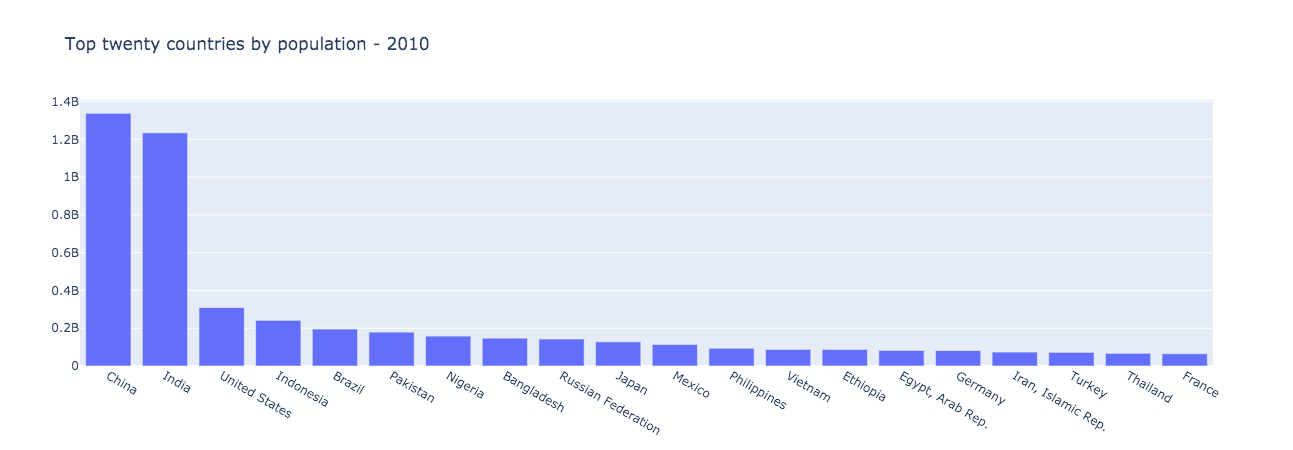

In [11]:
fig = go.Figure()
fig.add_bar(x=year_df['Country Name'], y=year_df[year])
fig.layout.title = f'Top twenty countries by population - {year}'
fig.show()

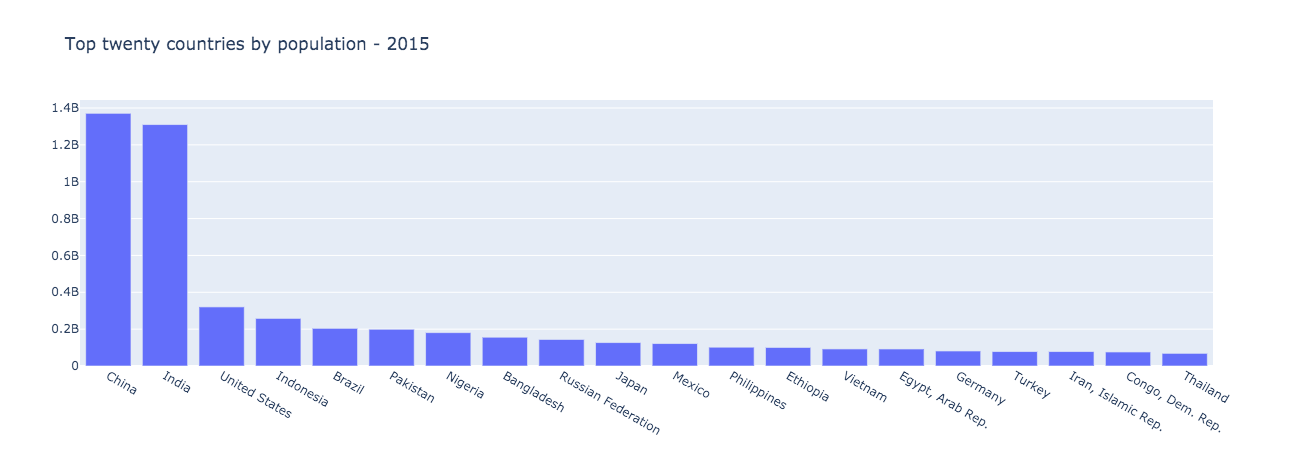

In [12]:
def plot_countries_by_population(year):
    fig = go.Figure()
    year_df = population_df[['Country Name', year]].sort_values(year, ascending=False)[:20]
    fig.add_bar(x=year_df['Country Name'], y=year_df[year])
    fig.layout.title = f'Top twenty countries by population - {year}'
    fig.show()
    
plot_countries_by_population('2015')

In [13]:
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Output, Input

app = JupyterDash(__name__)

app.layout = html.Div([
    dcc.Dropdown(id='year_dropdown',
                 value='2010',
                 options=[{'label': year, 'value': str(year)}
                          for year in range(1974, 2019)]),
    dcc.Graph(id='population_chart'),
])

@app.callback(Output('population_chart', 'figure'),
              Input('year_dropdown', 'value'))
def plot_countries_by_population(year):
    fig = go.Figure()
    year_df = population_df[['Country Name', year]].sort_values(year, ascending=False)[:20]
    fig.add_bar(x=year_df['Country Name'], y=year_df[year])
    fig.layout.title = f'Top twenty countries by population - {year}'
    return fig

app.run_server(mode='inline')

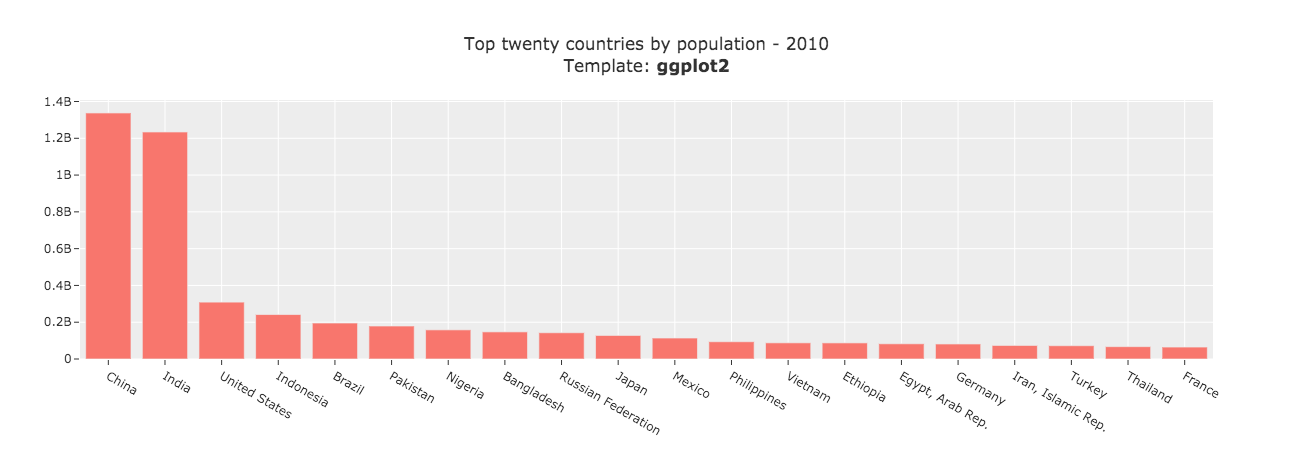

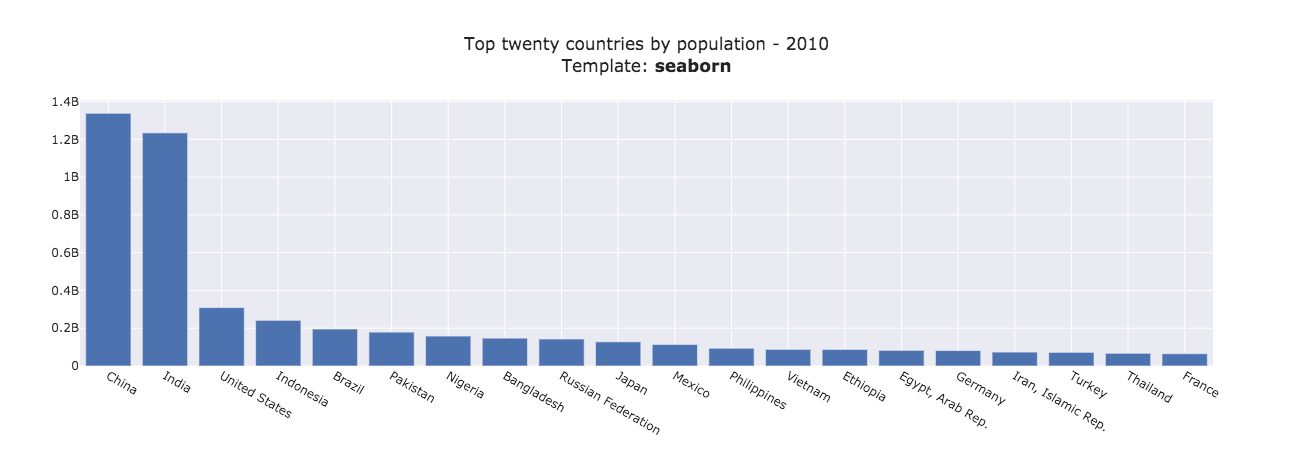

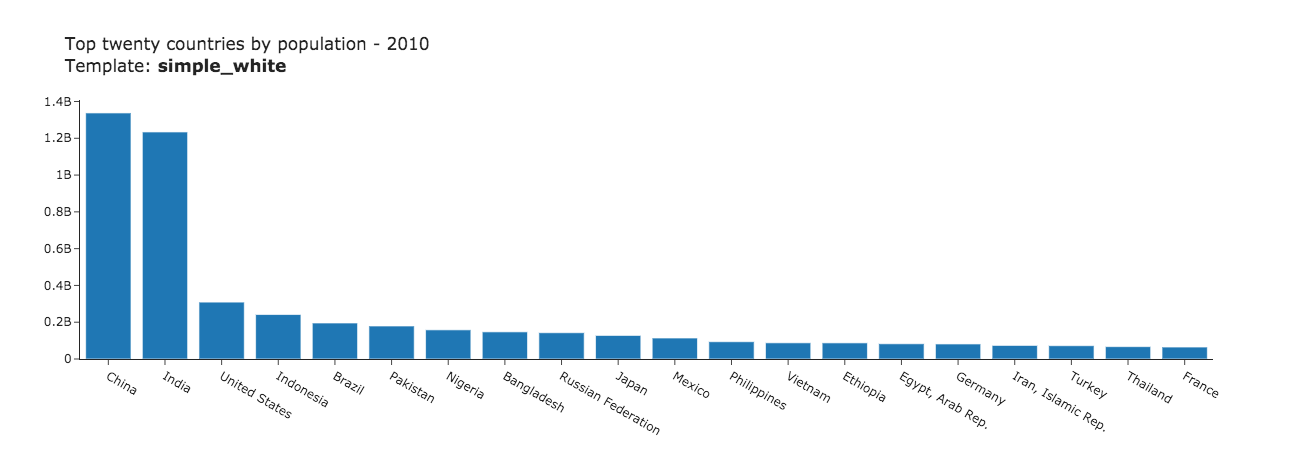

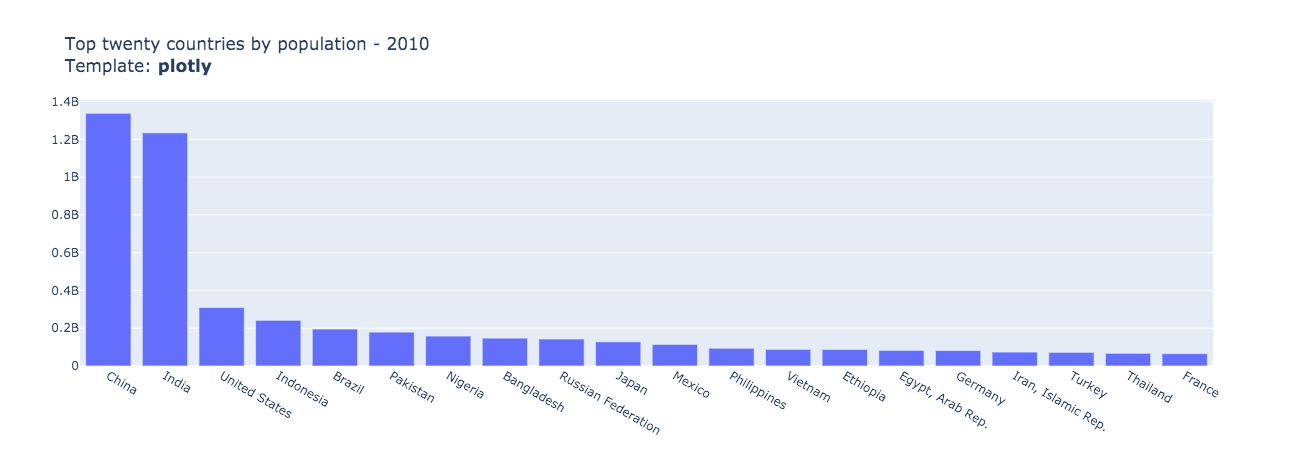

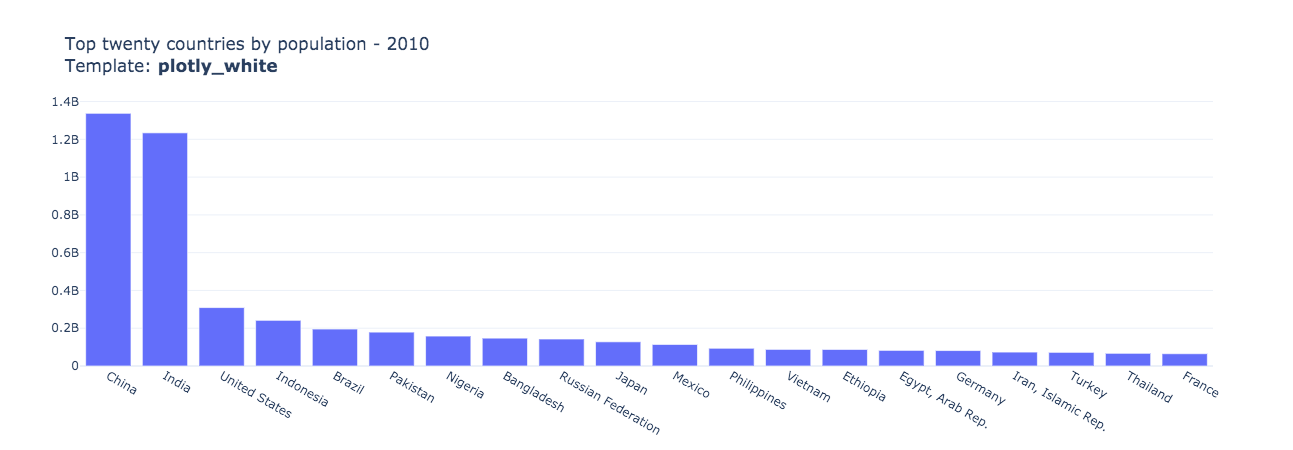

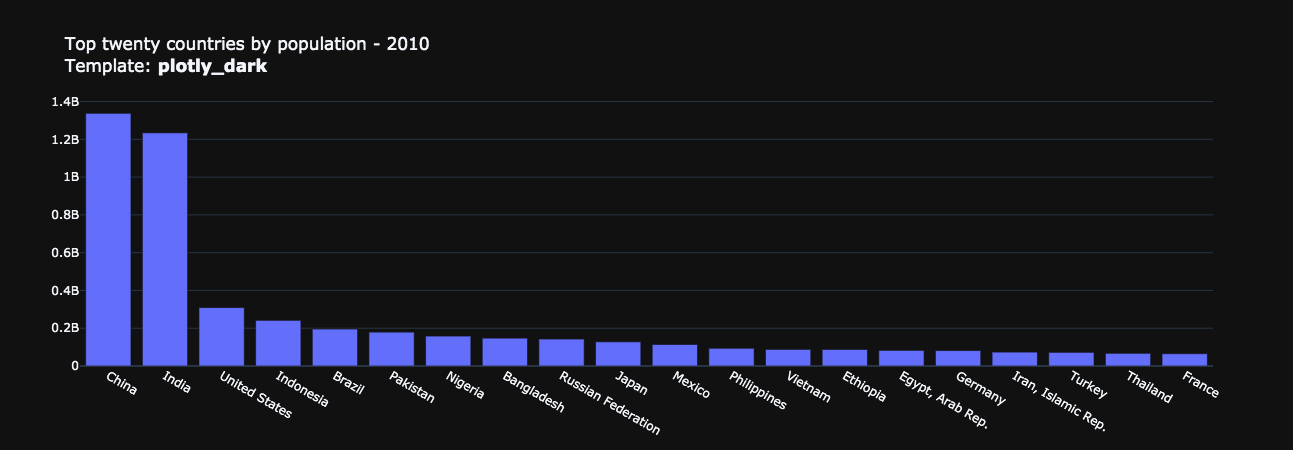

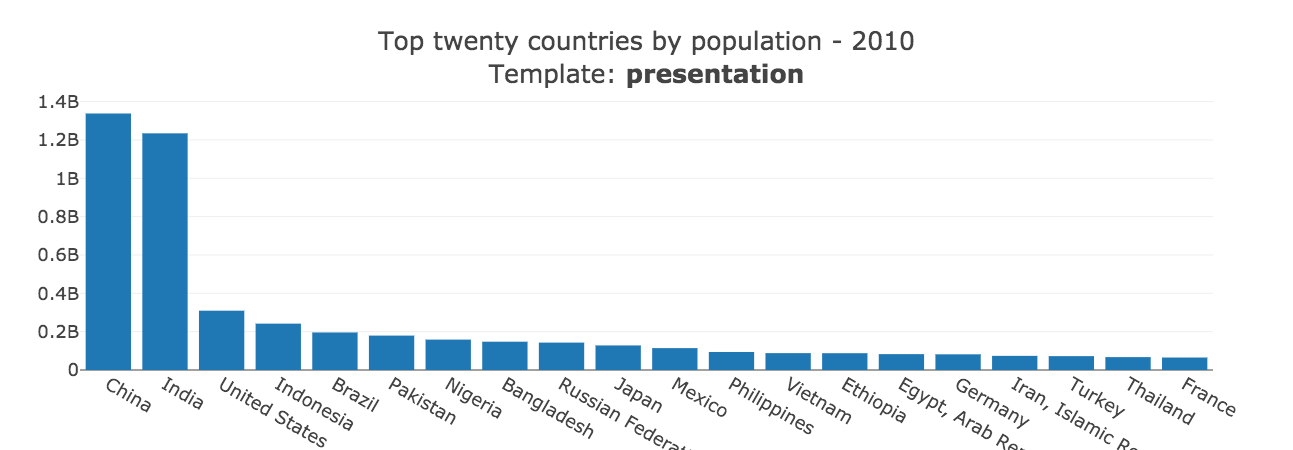

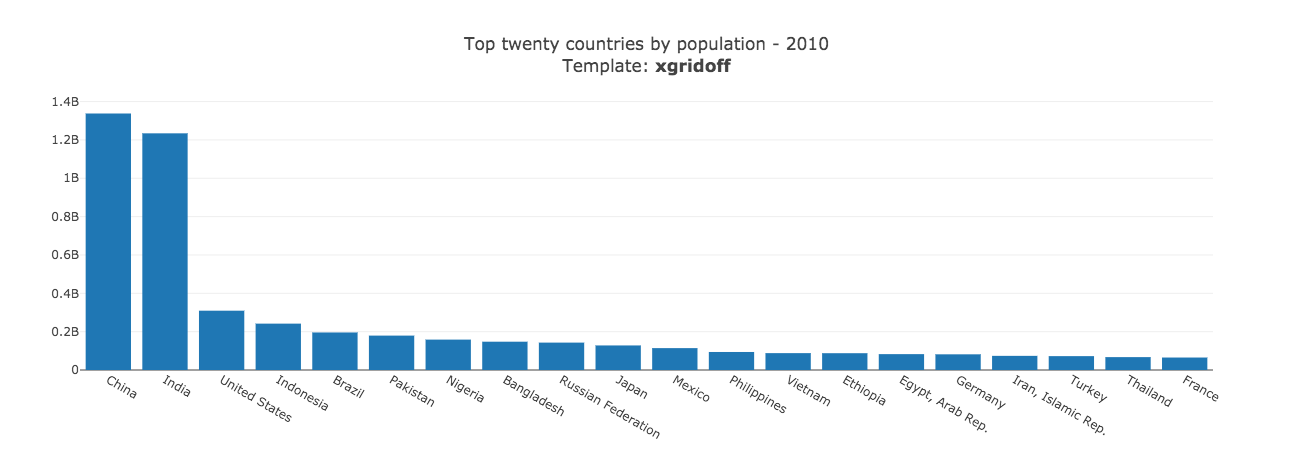

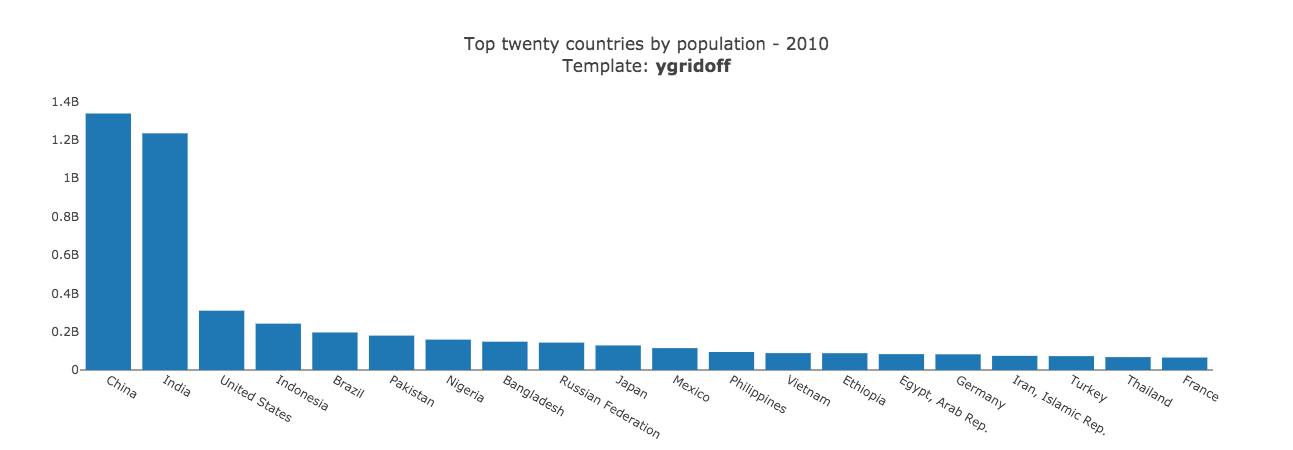

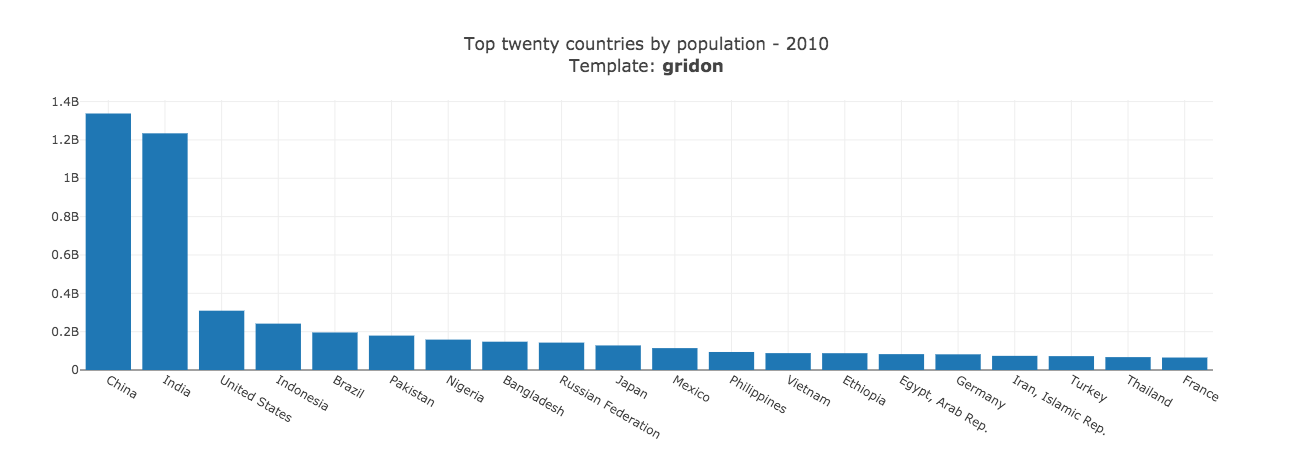

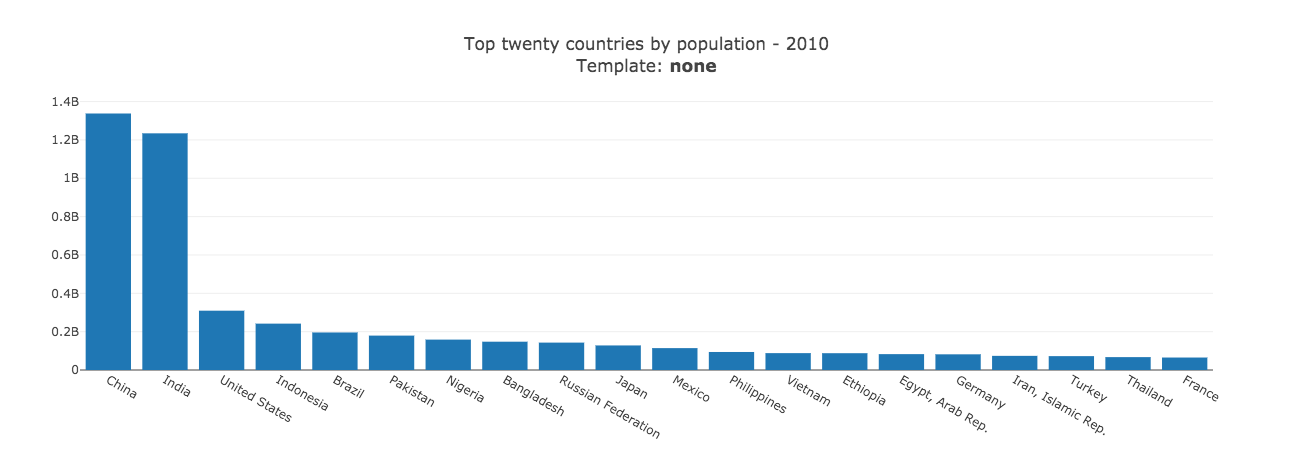

In [14]:
import plotly
for template in plotly.io.templates:
    fig.layout.template = template
    fig.layout.title = f'Top twenty countries by population - 2010<br>Template: <b>{template}</b>'
    fig.show()